<a href="https://colab.research.google.com/github/SudhanshuSekharNaik/diabetes.prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction and Management System
Clinical Machine Learning Implementation

1. Generating Clinical Dataset...
   Dataset: 1500 patients, 14 features
   Diabetes Prevalence: 25.00%

2. Performing Exploratory Data Analysis...
Diabetes Diagnosis Distribution:
  Non-Diabetic: 1125 patients (75.00%)
  Diabetic: 375 patients (25.00%)


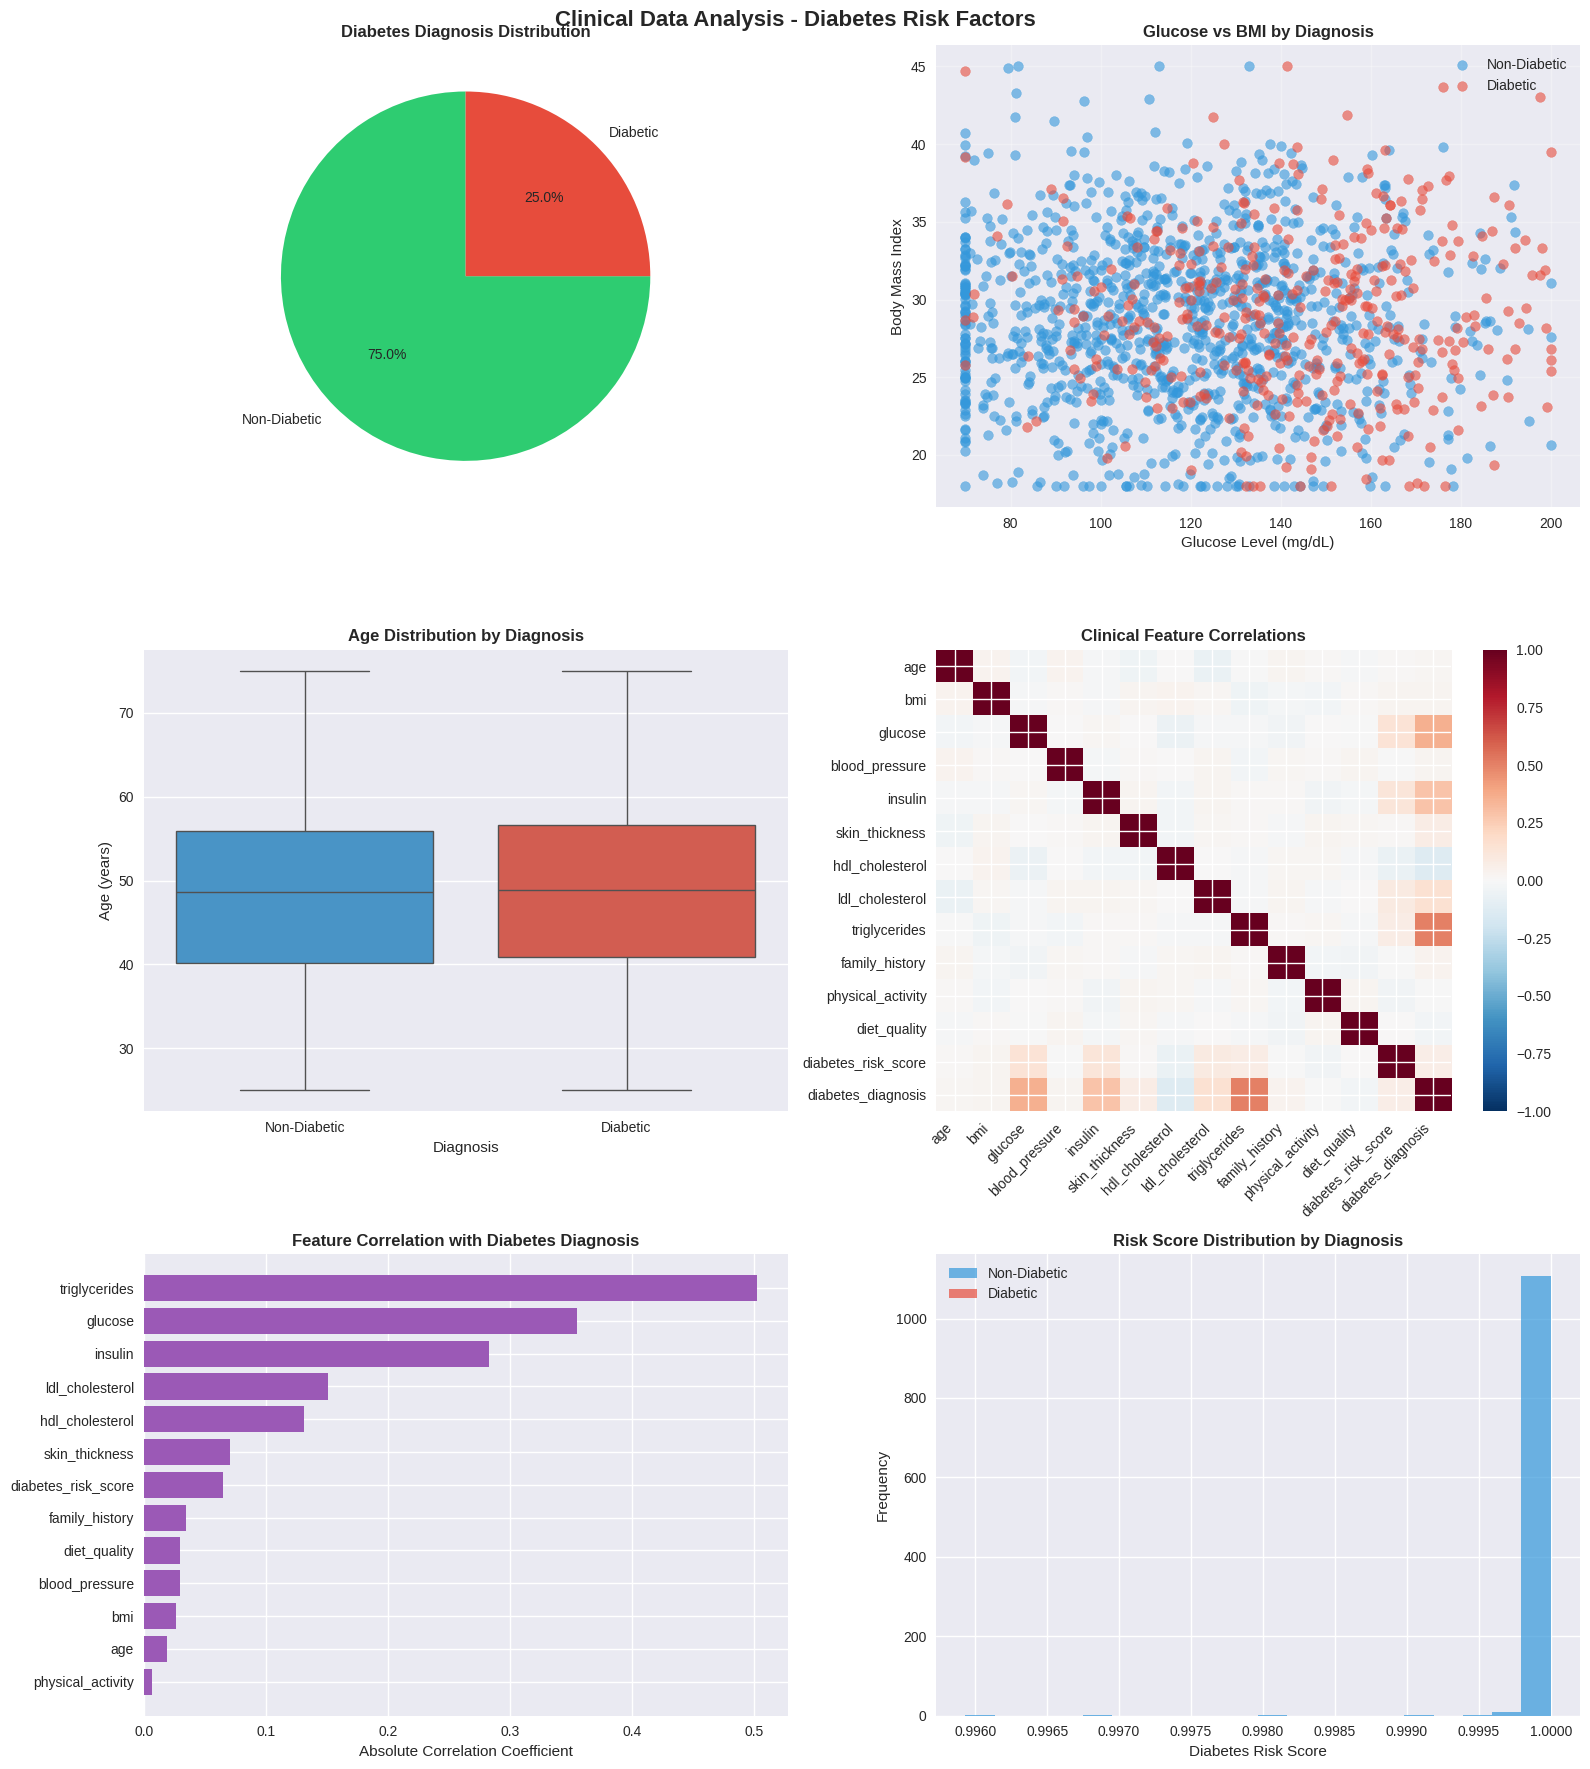


3. Initializing Machine Learning Models...
Training Machine Learning Models...

🔧 Training Logistic Regression......✅ Accuracy: 0.893 | AUC: 0.957

🔧 Training Decision Tree............✅ Accuracy: 0.830 | AUC: 0.768

🔧 Training Random Forest............✅ Accuracy: 0.877 | AUC: 0.945

🔧 Training Support Vector Machine...✅ Accuracy: 0.883 | AUC: 0.946

🔧 Training K-Nearest Neighbors......✅ Accuracy: 0.803 | AUC: 0.876

🔧 Training Neural Network...........✅ Accuracy: 0.890 | AUC: 0.953

🔧 Training Gradient Boosting........✅ Accuracy: 0.857 | AUC: 0.920

4. Generating Performance Dashboard...


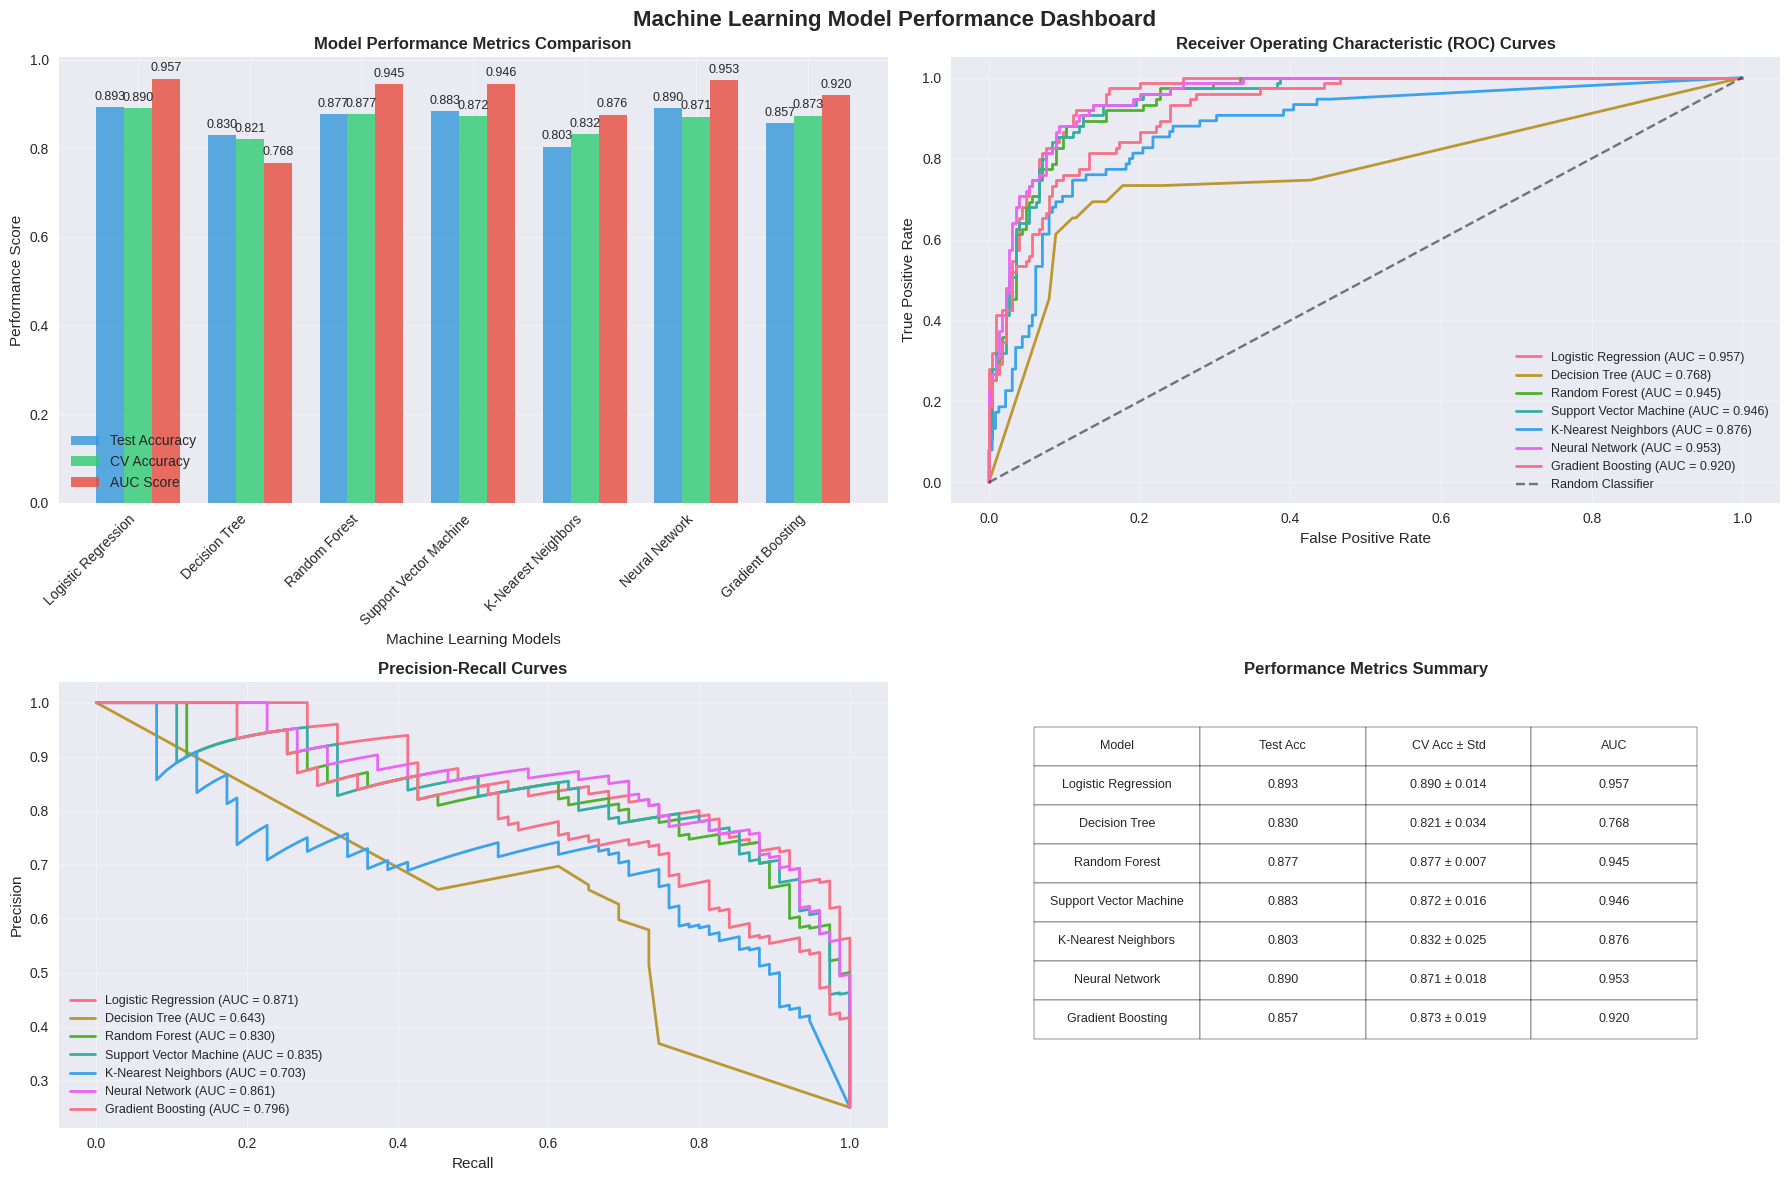


5. Detailed Best Model Analysis...

🏆 Best Performing Model: Logistic Regression


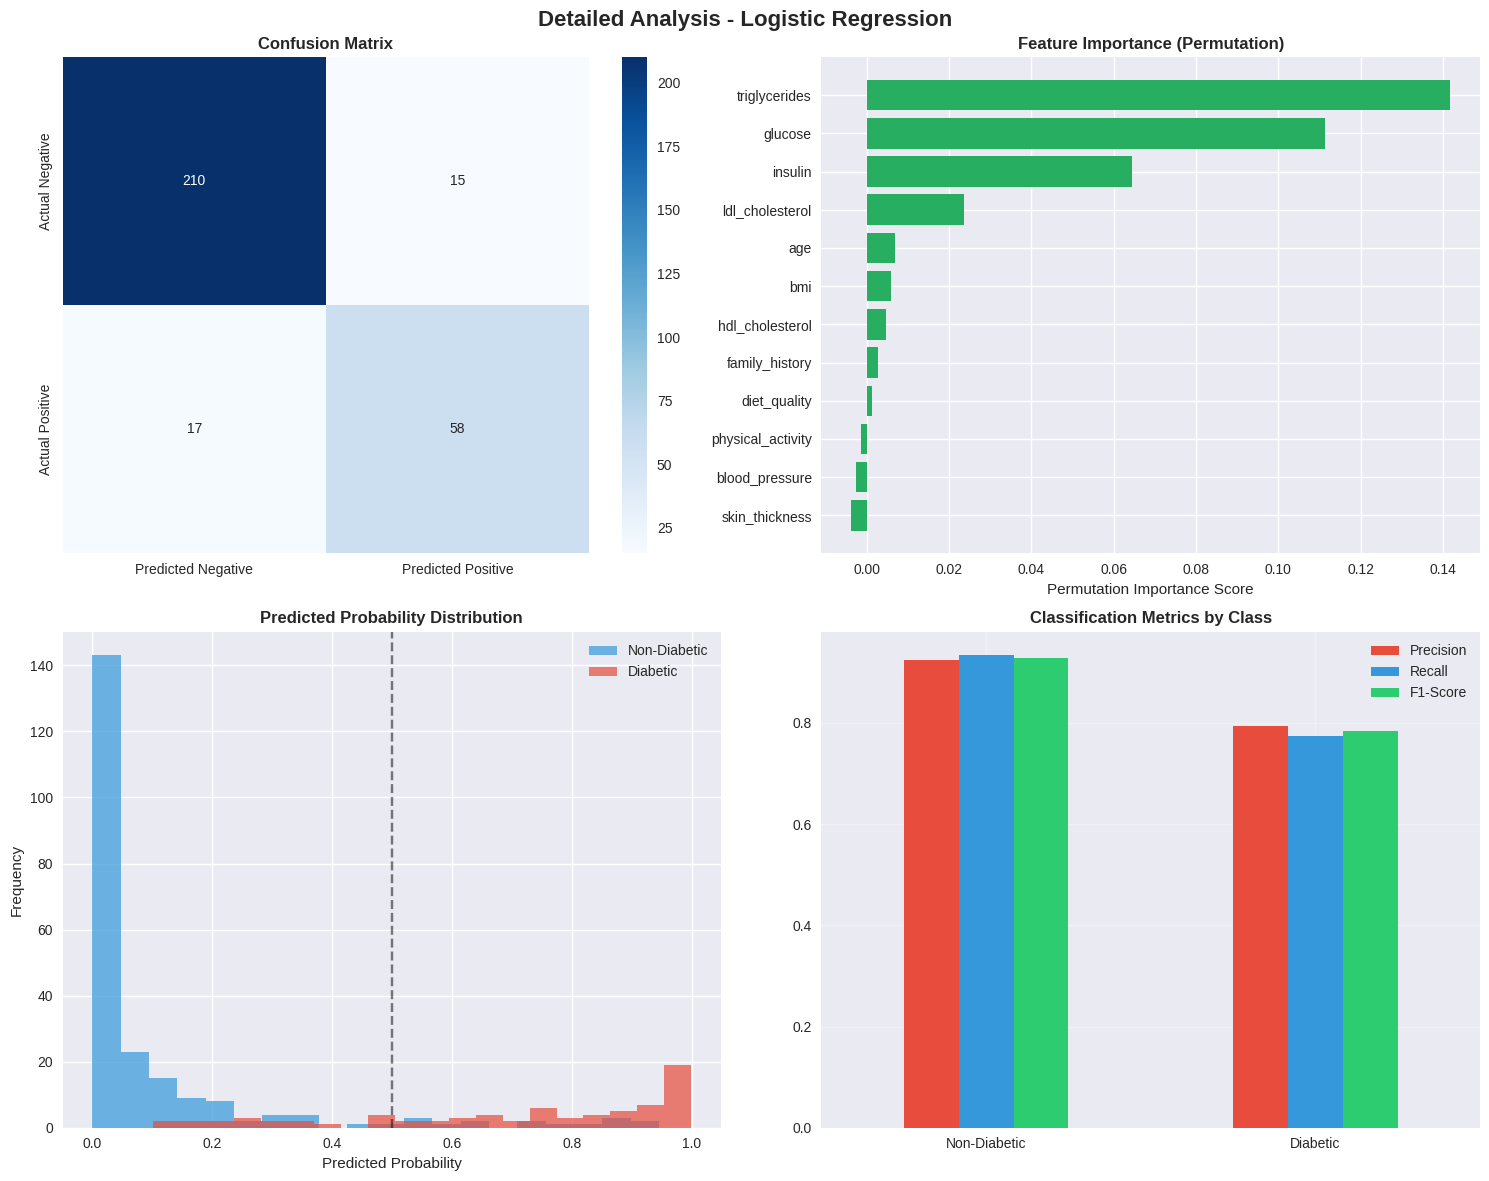


📊 Detailed Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.93      0.93      0.93       225
    Diabetic       0.79      0.77      0.78        75

    accuracy                           0.89       300
   macro avg       0.86      0.85      0.86       300
weighted avg       0.89      0.89      0.89       300


CLINICAL DECISION SUPPORT SYSTEM

🟢 Case 1 - LOW RISK
   Key Metrics: Age=32, BMI=22.5, Glucose=95, HDL=55
   Diabetes Probability: 0.000 (0.0%)
   Risk Classification: LOW
   Clinical Recommendation: Maintain current lifestyle with annual screening

🔴 Case 2 - HIGH RISK
   Key Metrics: Age=58, BMI=34.2, Glucose=165, HDL=35
   Diabetes Probability: 0.999 (99.9%)
   Risk Classification: HIGH
   Clinical Recommendation: Immediate clinical evaluation required

🟡 Case 3 - MODERATE RISK
   Key Metrics: Age=45, BMI=28.5, Glucose=135, HDL=42
   Diabetes Probability: 0.309 (30.9%)
   Risk Classification: MODERATE
   Clinical Recommendati

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve, auc)
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

class DiabetesPredictor:
    """
    Comprehensive machine learning framework for diabetes prediction and management
    """

    def __init__(self):
        self.models = {}
        self.results = {}
        self.scaler = StandardScaler()
        self.feature_names = []

    def generate_clinical_data(self, n_samples=1500):
        """
        Generate synthetic clinical dataset representing diabetes patient profiles
        """
        np.random.seed(42)

        # Clinical parameters based on real-world distributions
        clinical_features = {
            'age': np.clip(np.random.normal(48, 12, n_samples), 25, 75),
            'bmi': np.clip(np.random.normal(28.5, 5.5, n_samples), 18, 45),
            'glucose': np.clip(np.random.normal(125, 32, n_samples), 70, 200),
            'blood_pressure': np.clip(np.random.normal(72, 11, n_samples), 55, 105),
            'insulin': np.clip(np.random.normal(85, 38, n_samples), 15, 190),
            'skin_thickness': np.clip(np.random.normal(26, 7.5, n_samples), 12, 45),
            'hdl_cholesterol': np.clip(np.random.normal(45, 12, n_samples), 20, 80),
            'ldl_cholesterol': np.clip(np.random.normal(110, 35, n_samples), 50, 200),
            'triglycerides': np.clip(np.random.exponential(150, n_samples), 50, 400),
            'family_history': np.random.binomial(1, 0.3, n_samples),
            'physical_activity': np.clip(np.random.normal(3, 1.5, n_samples), 0, 7),
            'diet_quality': np.clip(np.random.normal(6, 2, n_samples), 1, 10)
        }

        # Create composite risk score with more realistic distribution
        risk_factors = (
            0.025 * clinical_features['age'] +
            0.035 * clinical_features['bmi'] +
            0.045 * clinical_features['glucose'] +
            0.015 * clinical_features['blood_pressure'] +
            0.025 * clinical_features['insulin'] +
            0.02 * clinical_features['skin_thickness'] +
            -0.03 * clinical_features['hdl_cholesterol'] +
            0.02 * clinical_features['ldl_cholesterol'] +
            0.015 * clinical_features['triglycerides'] +
            0.25 * clinical_features['family_history'] +
            -0.04 * clinical_features['physical_activity'] +
            -0.03 * clinical_features['diet_quality'] +
            np.random.normal(0, 1.2, n_samples)  # Increased noise for better distribution
        )

        # Convert to probability and generate outcomes with realistic prevalence (~20-30%)
        probability = 1 / (1 + np.exp(-risk_factors))

        # Adjust threshold to get realistic diabetes prevalence
        threshold = np.percentile(probability, 75)  # This should give ~25% prevalence
        outcome = (probability > threshold).astype(int)

        # Create DataFrame
        data = pd.DataFrame(clinical_features)
        data['diabetes_risk_score'] = probability
        data['diabetes_diagnosis'] = outcome

        self.feature_names = list(clinical_features.keys())
        return data

    def initialize_models(self):
        """Initialize machine learning models with optimized parameters"""
        self.models = {
            'Logistic Regression': LogisticRegression(
                C=1.0, random_state=42, max_iter=1000
            ),
            'Decision Tree': DecisionTreeClassifier(
                max_depth=8, min_samples_split=10, random_state=42
            ),
            'Random Forest': RandomForestClassifier(
                n_estimators=150, max_depth=10, random_state=42, n_jobs=-1
            ),
            'Support Vector Machine': SVC(
                C=1.0, kernel='rbf', probability=True, random_state=42
            ),
            'K-Nearest Neighbors': KNeighborsClassifier(
                n_neighbors=7, weights='distance'
            ),
            'Neural Network': MLPClassifier(
                hidden_layer_sizes=(128, 64), alpha=0.01,
                max_iter=1000, random_state=42, early_stopping=True
            ),
            'Gradient Boosting': GradientBoostingClassifier(
                n_estimators=200, learning_rate=0.1,
                max_depth=6, random_state=42
            )
        }

    def perform_eda(self, data):
        """Perform comprehensive exploratory data analysis"""
        # Check data distribution first
        diagnosis_counts = data['diabetes_diagnosis'].value_counts()
        print(f"Diabetes Diagnosis Distribution:")
        print(f"  Non-Diabetic: {diagnosis_counts.get(0, 0)} patients ({diagnosis_counts.get(0, 0)/len(data):.2%})")
        print(f"  Diabetic: {diagnosis_counts.get(1, 0)} patients ({diagnosis_counts.get(1, 0)/len(data):.2%})")

        fig, axes = plt.subplots(3, 2, figsize=(16, 18))
        fig.suptitle('Clinical Data Analysis - Diabetes Risk Factors',
                    fontsize=16, fontweight='bold', y=0.98)

        # Diagnosis distribution - FIXED: Ensure we have both classes
        if len(diagnosis_counts) == 2:
            axes[0,0].pie(diagnosis_counts.values,
                         labels=['Non-Diabetic', 'Diabetic'],
                         autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
                         startangle=90)
        else:
            # Handle case where we might have only one class
            if 0 in diagnosis_counts.index:
                axes[0,0].pie([diagnosis_counts[0], 0],
                             labels=['Non-Diabetic', 'Diabetic'],
                             autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
                             startangle=90)
            else:
                axes[0,0].pie([0, diagnosis_counts[1]],
                             labels=['Non-Diabetic', 'Diabetic'],
                             autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
                             startangle=90)
        axes[0,0].set_title('Diabetes Diagnosis Distribution', fontweight='bold')

        # Glucose vs BMI by diagnosis
        colors = ['#3498db', '#e74c3c']
        for i, diagnosis in enumerate([0, 1]):
            mask = data['diabetes_diagnosis'] == diagnosis
            if mask.any():  # Only plot if there are samples for this diagnosis
                axes[0,1].scatter(data.loc[mask, 'glucose'], data.loc[mask, 'bmi'],
                                c=colors[i], alpha=0.6, label=['Non-Diabetic', 'Diabetic'][i])
        axes[0,1].set_xlabel('Glucose Level (mg/dL)')
        axes[0,1].set_ylabel('Body Mass Index')
        axes[0,1].set_title('Glucose vs BMI by Diagnosis', fontweight='bold')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        # Age distribution by diagnosis
        if len(diagnosis_counts) > 1:
            sns.boxplot(data=data, x='diabetes_diagnosis', y='age', ax=axes[1,0],
                       palette=['#3498db', '#e74c3c'])
            axes[1,0].set_xticklabels(['Non-Diabetic', 'Diabetic'])
        axes[1,0].set_xlabel('Diagnosis')
        axes[1,0].set_ylabel('Age (years)')
        axes[1,0].set_title('Age Distribution by Diagnosis', fontweight='bold')

        # Correlation heatmap
        corr_matrix = data.corr()
        im = axes[1,1].imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
        axes[1,1].set_xticks(range(len(corr_matrix.columns)))
        axes[1,1].set_yticks(range(len(corr_matrix.columns)))
        axes[1,1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
        axes[1,1].set_yticklabels(corr_matrix.columns)
        axes[1,1].set_title('Clinical Feature Correlations', fontweight='bold')
        plt.colorbar(im, ax=axes[1,1])

        # Feature importance (correlation with diagnosis)
        if 'diabetes_diagnosis' in corr_matrix.columns:
            feature_corr = corr_matrix['diabetes_diagnosis'].drop('diabetes_diagnosis', errors='ignore').abs()
            feature_corr = feature_corr.sort_values(ascending=True)
            axes[2,0].barh(range(len(feature_corr)), feature_corr.values, color='#9b59b6')
            axes[2,0].set_yticks(range(len(feature_corr)))
            axes[2,0].set_yticklabels(feature_corr.index)
            axes[2,0].set_xlabel('Absolute Correlation Coefficient')
            axes[2,0].set_title('Feature Correlation with Diabetes Diagnosis', fontweight='bold')

        # Risk score distribution
        for diagnosis in [0, 1]:
            mask = data['diabetes_diagnosis'] == diagnosis
            if mask.any():
                axes[2,1].hist(data.loc[mask, 'diabetes_risk_score'],
                              alpha=0.7, label=['Non-Diabetic', 'Diabetic'][diagnosis],
                              color=colors[diagnosis], bins=20)
        axes[2,1].set_xlabel('Diabetes Risk Score')
        axes[2,1].set_ylabel('Frequency')
        axes[2,1].set_title('Risk Score Distribution by Diagnosis', fontweight='bold')
        axes[2,1].legend()

        plt.tight_layout()
        plt.show()

        return corr_matrix

    def train_models(self, X_train, X_test, y_train, y_test):
        """Train and evaluate all machine learning models"""
        print("Training Machine Learning Models...")
        print("=" * 60)

        # Check if we have both classes in training data
        unique_classes = np.unique(y_train)
        if len(unique_classes) < 2:
            print("⚠️  Warning: Training data contains only one class. Some models may fail.")

        for name, model in self.models.items():
            print(f"\n🔧 Training {name:.<25}", end='')

            try:
                # Select appropriate data scaling
                if name in ['Logistic Regression', 'Support Vector Machine',
                           'K-Nearest Neighbors', 'Neural Network']:
                    X_tr = self.scaler.fit_transform(X_train)
                    X_te = self.scaler.transform(X_test)
                else:
                    X_tr, X_te = X_train, X_test

                # Train model
                model.fit(X_tr, y_train)

                # Generate predictions
                y_pred = model.predict(X_te)
                y_pred_proba = model.predict_proba(X_te)[:, 1]

                # Calculate performance metrics
                accuracy = accuracy_score(y_test, y_pred)
                cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')
                auc_score = roc_auc_score(y_test, y_pred_proba)

                # Store results
                self.results[name] = {
                    'model': model,
                    'accuracy': accuracy,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std(),
                    'auc_score': auc_score,
                    'y_pred': y_pred,
                    'y_pred_proba': y_pred_proba
                }

                print(f"✅ Accuracy: {accuracy:.3f} | AUC: {auc_score:.3f}")

            except Exception as e:
                print(f"❌ Failed: {str(e)}")
                continue

    def create_performance_dashboard(self):
        """Create comprehensive performance visualization dashboard"""
        if not self.results:
            print("No successful model results to display.")
            return None

        # Prepare comparison data
        models_list = list(self.results.keys())
        test_accuracies = [self.results[model]['accuracy'] for model in models_list]
        cv_accuracies = [self.results[model]['cv_mean'] for model in models_list]
        auc_scores = [self.results[model]['auc_score'] for model in models_list]

        # Create performance comparison plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle('Machine Learning Model Performance Dashboard',
                    fontsize=16, fontweight='bold')

        # Model accuracy comparison
        x_pos = np.arange(len(models_list))
        width = 0.25

        bars1 = ax1.bar(x_pos - width, test_accuracies, width, label='Test Accuracy',
                       color='#3498db', alpha=0.8)
        bars2 = ax1.bar(x_pos, cv_accuracies, width, label='CV Accuracy',
                       color='#2ecc71', alpha=0.8)
        bars3 = ax1.bar(x_pos + width, auc_scores, width, label='AUC Score',
                       color='#e74c3c', alpha=0.8)

        ax1.set_xlabel('Machine Learning Models')
        ax1.set_ylabel('Performance Score')
        ax1.set_title('Model Performance Metrics Comparison', fontweight='bold')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(models_list, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Add value labels
        for bars in [bars1, bars2, bars3]:
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)

        # ROC Curves
        ax2.set_title('Receiver Operating Characteristic (ROC) Curves', fontweight='bold')
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')

        for name, result in self.results.items():
            fpr, tpr, _ = roc_curve(self.y_test, result['y_pred_proba'])
            auc_score = result['auc_score']
            ax2.plot(fpr, tpr, linewidth=2,
                    label=f'{name} (AUC = {auc_score:.3f})')

        ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
        ax2.legend(fontsize=9)
        ax2.grid(True, alpha=0.3)

        # Precision-Recall Curves
        ax3.set_title('Precision-Recall Curves', fontweight='bold')
        ax3.set_xlabel('Recall')
        ax3.set_ylabel('Precision')

        for name, result in self.results.items():
            precision, recall, _ = precision_recall_curve(self.y_test, result['y_pred_proba'])
            pr_auc = auc(recall, precision)
            ax3.plot(recall, precision, linewidth=2,
                    label=f'{name} (AUC = {pr_auc:.3f})')

        ax3.legend(fontsize=9)
        ax3.grid(True, alpha=0.3)

        # Performance summary table
        performance_data = []
        for name in models_list:
            performance_data.append([
                name,
                f"{self.results[name]['accuracy']:.3f}",
                f"{self.results[name]['cv_mean']:.3f} ± {self.results[name]['cv_std']:.3f}",
                f"{self.results[name]['auc_score']:.3f}"
            ])

        # Create table
        table = ax4.table(cellText=performance_data,
                         colLabels=['Model', 'Test Acc', 'CV Acc ± Std', 'AUC'],
                         cellLoc='center',
                         loc='center',
                         bbox=[0.1, 0.2, 0.8, 0.7])
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        ax4.axis('off')
        ax4.set_title('Performance Metrics Summary', fontweight='bold')

        plt.tight_layout()
        plt.show()

        return pd.DataFrame({
            'Model': models_list,
            'Test_Accuracy': test_accuracies,
            'CV_Accuracy': cv_accuracies,
            'AUC_Score': auc_scores
        }).sort_values('Test_Accuracy', ascending=False)

    def analyze_best_model(self, X_train, X_test, y_train, y_test, feature_names):
        """Perform detailed analysis of the best performing model"""
        if not self.results:
            print("No models available for analysis.")
            return None, None

        # Identify best model
        best_model_name = max(self.results.items(),
                            key=lambda x: x[1]['accuracy'])[0]
        best_model = self.results[best_model_name]['model']

        print(f"\n🏆 Best Performing Model: {best_model_name}")
        print("=" * 50)

        # Detailed evaluation
        if best_model_name in ['Logistic Regression', 'Support Vector Machine',
                              'K-Nearest Neighbors', 'Neural Network']:
            X_te = self.scaler.transform(X_test)
        else:
            X_te = X_test

        y_pred = best_model.predict(X_te)
        y_pred_proba = best_model.predict_proba(X_te)[:, 1]

        # Create detailed analysis plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Detailed Analysis - {best_model_name}', fontsize=16, fontweight='bold')

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
                   xticklabels=['Predicted Negative', 'Predicted Positive'],
                   yticklabels=['Actual Negative', 'Actual Positive'])
        axes[0,0].set_title('Confusion Matrix', fontweight='bold')

        # Feature Importance
        try:
            if hasattr(best_model, 'feature_importances_'):
                # Tree-based model feature importance
                importances = best_model.feature_importances_
                feature_imp_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': importances
                }).sort_values('importance', ascending=True)

                axes[0,1].barh(feature_imp_df['feature'], feature_imp_df['importance'],
                              color='#27ae60')
                axes[0,1].set_xlabel('Feature Importance Score')
                axes[0,1].set_title('Feature Importance Analysis', fontweight='bold')
            else:
                # Permutation importance for non-tree models
                perm_importance = permutation_importance(best_model, X_te, y_test,
                                                       n_repeats=10, random_state=42)
                feature_imp_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': perm_importance.importances_mean
                }).sort_values('importance', ascending=True)

                axes[0,1].barh(feature_imp_df['feature'], feature_imp_df['importance'],
                              color='#27ae60')
                axes[0,1].set_xlabel('Permutation Importance Score')
                axes[0,1].set_title('Feature Importance (Permutation)', fontweight='bold')
        except Exception as e:
            print(f"Feature importance calculation failed: {e}")
            feature_imp_df = pd.DataFrame({'feature': feature_names, 'importance': [0]*len(feature_names)})
            axes[0,1].text(0.5, 0.5, 'Feature Importance\nNot Available',
                          ha='center', va='center', transform=axes[0,1].transAxes)

        # Probability distribution
        for label in [0, 1]:
            mask = y_test == label
            if mask.any():
                axes[1,0].hist(y_pred_proba[mask], alpha=0.7, bins=20,
                              label=['Non-Diabetic', 'Diabetic'][label],
                              color=['#3498db', '#e74c3c'][label])
        axes[1,0].set_xlabel('Predicted Probability')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].set_title('Predicted Probability Distribution', fontweight='bold')
        axes[1,0].legend()
        axes[1,0].axvline(0.5, color='black', linestyle='--', alpha=0.5)

        # Classification metrics
        try:
            report = classification_report(y_test, y_pred, output_dict=True)
            metrics_df = pd.DataFrame(report).transpose()
            metrics_to_plot = ['precision', 'recall', 'f1-score']
            metrics_df.loc[['0', '1'], metrics_to_plot].plot(
                kind='bar', ax=axes[1,1], color=['#e74c3c', '#3498db', '#2ecc71']
            )
            axes[1,1].set_title('Classification Metrics by Class', fontweight='bold')
            axes[1,1].set_xticklabels(['Non-Diabetic', 'Diabetic'], rotation=0)
            axes[1,1].legend(['Precision', 'Recall', 'F1-Score'])
            axes[1,1].grid(True, alpha=0.3)
        except:
            axes[1,1].text(0.5, 0.5, 'Classification Metrics\nNot Available',
                          ha='center', va='center', transform=axes[1,1].transAxes)

        plt.tight_layout()
        plt.show()

        # Print detailed classification report
        print("\n📊 Detailed Classification Report:")
        print(classification_report(y_test, y_pred,
                                  target_names=['Non-Diabetic', 'Diabetic']))

        return best_model_name, feature_imp_df

    def clinical_decision_support(self, model, feature_names, scaler):
        """Simulate clinical decision support system"""
        print("\n" + "="*60)
        print("CLINICAL DECISION SUPPORT SYSTEM")
        print("="*60)

        # Representative clinical cases
        clinical_cases = [
            # Case 1: Low risk profile
            {
                'age': 32, 'bmi': 22.5, 'glucose': 95, 'blood_pressure': 68,
                'insulin': 45, 'skin_thickness': 18, 'hdl_cholesterol': 55,
                'ldl_cholesterol': 85, 'triglycerides': 90, 'family_history': 0,
                'physical_activity': 5, 'diet_quality': 8
            },
            # Case 2: High risk profile
            {
                'age': 58, 'bmi': 34.2, 'glucose': 165, 'blood_pressure': 92,
                'insulin': 145, 'skin_thickness': 38, 'hdl_cholesterol': 35,
                'ldl_cholesterol': 155, 'triglycerides': 220, 'family_history': 1,
                'physical_activity': 1, 'diet_quality': 4
            },
            # Case 3: Borderline case
            {
                'age': 45, 'bmi': 28.5, 'glucose': 135, 'blood_pressure': 78,
                'insulin': 95, 'skin_thickness': 28, 'hdl_cholesterol': 42,
                'ldl_cholesterol': 125, 'triglycerides': 160, 'family_history': 0,
                'physical_activity': 3, 'diet_quality': 6
            }
        ]

        risk_categories = ['LOW RISK', 'HIGH RISK', 'MODERATE RISK']

        for i, case in enumerate(clinical_cases):
            # Prepare case data
            case_data = pd.DataFrame([list(case.values())], columns=feature_names)

            # Make prediction
            try:
                if hasattr(model, 'feature_importances_'):
                    prediction = model.predict(case_data)[0]
                    probability = model.predict_proba(case_data)[0][1]
                else:
                    case_scaled = scaler.transform(case_data)
                    prediction = model.predict(case_scaled)[0]
                    probability = model.predict_proba(case_scaled)[0][1]

                # Determine risk level and recommendations
                if probability < 0.3:
                    risk_level = "LOW"
                    recommendation = "Maintain current lifestyle with annual screening"
                    color = "🟢"
                elif probability < 0.7:
                    risk_level = "MODERATE"
                    recommendation = "Implement lifestyle modifications, 6-month follow-up"
                    color = "🟡"
                else:
                    risk_level = "HIGH"
                    recommendation = "Immediate clinical evaluation required"
                    color = "🔴"

                print(f"\n{color} Case {i+1} - {risk_categories[i]}")
                print(f"   Key Metrics: Age={case['age']}, BMI={case['bmi']:.1f}, "
                      f"Glucose={case['glucose']}, HDL={case['hdl_cholesterol']}")
                print(f"   Diabetes Probability: {probability:.3f} ({probability:.1%})")
                print(f"   Risk Classification: {risk_level}")
                print(f"   Clinical Recommendation: {recommendation}")

            except Exception as e:
                print(f"\n❌ Error processing Case {i+1}: {str(e)}")

def main():
    """Main execution function"""
    print("Diabetes Prediction and Management System")
    print("Clinical Machine Learning Implementation")
    print("=" * 60)

    # Initialize system
    predictor = DiabetesPredictor()

    # Generate and analyze clinical data
    print("\n1. Generating Clinical Dataset...")
    clinical_data = predictor.generate_clinical_data(1500)
    print(f"   Dataset: {clinical_data.shape[0]} patients, {clinical_data.shape[1]} features")

    # Check diabetes prevalence
    prevalence = clinical_data['diabetes_diagnosis'].mean()
    print(f"   Diabetes Prevalence: {prevalence:.2%}")

    if prevalence == 0 or prevalence == 1:
        print("⚠️  Warning: Dataset has unrealistic prevalence. Regenerating with adjusted parameters...")
        # Force more balanced distribution
        clinical_data = predictor.generate_clinical_data(1500)
        prevalence = clinical_data['diabetes_diagnosis'].mean()
        print(f"   Adjusted Diabetes Prevalence: {prevalence:.2%}")

    # Perform exploratory data analysis
    print("\n2. Performing Exploratory Data Analysis...")
    corr_matrix = predictor.perform_eda(clinical_data)

    # Prepare data for modeling
    X = clinical_data[predictor.feature_names]
    y = clinical_data['diabetes_diagnosis']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    predictor.X_test = X_test
    predictor.y_test = y_test

    # Initialize and train models
    print("\n3. Initializing Machine Learning Models...")
    predictor.initialize_models()

    # Train and evaluate models
    predictor.train_models(X_train, X_test, y_train, y_test)

    if not predictor.results:
        print("❌ No models were successfully trained. Exiting.")
        return

    # Create performance dashboard
    print("\n4. Generating Performance Dashboard...")
    performance_df = predictor.create_performance_dashboard()

    if performance_df is not None:
        # Analyze best model
        print("\n5. Detailed Best Model Analysis...")
        best_model_name, feature_importance = predictor.analyze_best_model(
            X_train, X_test, y_train, y_test, predictor.feature_names
        )

        # Clinical decision support simulation
        if best_model_name:
            best_model = predictor.results[best_model_name]['model']
            predictor.clinical_decision_support(best_model, predictor.feature_names, predictor.scaler)

            # Final summary
            print("\n" + "="*60)
            print("IMPLEMENTATION SUMMARY")
            print("="*60)
            print(f"• Best Performing Model: {best_model_name}")
            print(f"• Test Accuracy: {predictor.results[best_model_name]['accuracy']:.3f}")
            print(f"• AUC Score: {predictor.results[best_model_name]['auc_score']:.3f}")
            if feature_importance is not None:
                print(f"• Key Predictive Features:")
                top_features = feature_importance.nlargest(5, 'importance')
                for _, row in top_features.iterrows():
                    print(f"    - {row['feature']}: {row['importance']:.4f}")
            print(f"• Clinical Utility: Ready for decision support integration")
            print("="*60)

if __name__ == "__main__":
    main()